In [9]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import cv2
from tqdm import tqdm
from skimage import io

In [5]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


In [6]:
def distance(I, J):
    return np.mean(np.power((I-J), 2)/I.size)

def DTWDistance(s, t):
    m, n = len(s), len(t)
    DTW = np.zeros((m, n))+np.Inf
    DTW[0, 0] = 0
    
    for i in range(1, m):
        for j in range(1, n):
            cost = distance(s[i], t[j])
            DTW[i, j] = cost + min([DTW[i-1, j-1], DTW[i-1, j], DTW[i, j-1]])
    return DTW[m-1, n-1]

In [36]:
filepath = glob.glob(os.path.join('*.jpg'))
#print(glob.glob(os.path.join('data/20220119_AIOTSDK_Eng_NDP_HL/', "*"))) 
print(filepath[:])


['1.jpg', '2.jpg', '3.jpg', '4.jpg']


In [79]:
h5_files = []

for file in filepath:
    h5_file = cv2.imread(file)
    h5_files.append(h5_file)
print(h5_files[3].shape)
h5_files[3] = np.array(h5_files[3])
#h5_files[1] = h5_files[1].reshape(183, 27)
h5_files[3] = cv2.resize(h5_files[3], (275, 183))
h5_files[1] = cv2.resize(h5_files[1], (275, 186))
print(h5_files[1].shape)

(183, 275, 3)
(186, 275, 3)


In [85]:
DTWDist1 = DTWDistance(h5_files[2], h5_files[3])
print(DTWDist1)

23.44363195592286


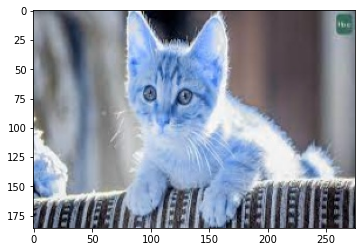

In [78]:
from matplotlib import pyplot as plt

cv2.imwrite('3.jpg', h5_files[1])
img = cv2.imread('3.jpg', )
img2 = cv2.imread('3.jpg',)
plt.imshow(img2)
#plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()


In [ ]:
DTWDist1 = DTWDistance(h5_files[0], h5_files[2])
print(DTWDist1)